# Compare Monte Carlo and simple Riemann integral
by calculating the volume of N-dimensional sphere with same number of function evaluations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Demonstration in 2 dimensions

Riemann: 1.00013343167
MC: 0.98676064717


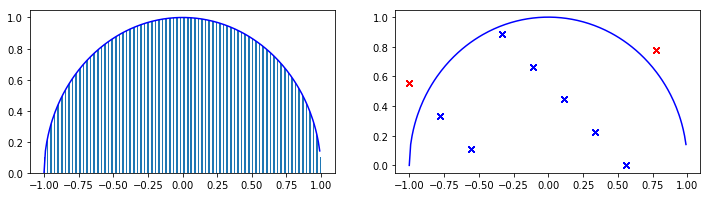

In [399]:
# 2D: Half circle

def half_circle(x,r):
    return np.sqrt(r*r-x*x)

# number of divisions
n = 200

# Riemann integral
x100 = np.arange(-1.0,1.0,0.01)
#xN = np.linspace(-1,1,n)
halfBin = 2.0/(n-1) / 2
xN = np.linspace(-(1-halfBin),1-halfBin,n) # shift with half bin

fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(121)
ax1.plot(x100,half_circle(x100,1.0),'b')
ax1.bar(xN,half_circle(xN,1.0), width=0.9/n)


# MC integral
#xMC = 2*np.random.rand(n)-1.0
#yMC = np.random.rand(n)
#USE LCG instead
xMC = 2*lcgN(n)-1.0
yMC = lcgN(n)
aboveIdx = (yMC >= half_circle(xMC,1.0))
belowIdx = (yMC < half_circle(xMC,1.0))
            
ax2 = fig.add_subplot(122)
ax2.plot(x100,half_circle(x100,1.0),'b')
ax2.plot(xMC[belowIdx],yMC[belowIdx],'bx')
ax2.plot(xMC[aboveIdx],yMC[aboveIdx],'rx')    

dx = 2.0/len(xN)
areaCirc = np.pi

print('Riemann:',2*np.nan_to_num(half_circle(xN,1.0)).sum() * dx / areaCirc) 

print('MC:',2*belowIdx.sum()/n/(np.pi/2.0))



In [375]:
#xN

### Higher dimensions

$$ {\displaystyle V_{n}(R)={\frac {\pi ^{\frac {n}{2}}}{\Gamma \left({\frac {n}{2}}+1\right)}}R^{n},} $$

In [407]:
# d dim, half hypersphere above a d-1 dimensional hypersphere

import math



def nSphereVolume(dd):
    '''The exact volume of a dd dimensional sphere'''
    return math.pi**(dd/2)/math.gamma(dd/2 + 1)

def half_hyperSphere(x,r):
    '''Returns the height of a radius r half-hypersphere above x'''
    return np.sqrt(r*r - (x*x).sum(axis=0))

# Riemann

DIM = 5
d = DIM-1 # this is(DIM-1), the hyperplane's dimension
n1 = int(10000**(1.0/d)) # the grid resolution on one side: max 100 in 4+1D
#x1 = np.array( np.meshgrid(*[np.linspace(i,j,n1) for i,j in zip(-np.ones(d),np.ones(d))]) )
halfBin = 2.0/(n1-1) / 2
x1 = np.array( np.meshgrid(*[np.linspace(i,j,n1) for i,j in zip(-np.ones(d)+halfBin,np.ones(d)-halfBin)]) )
dV = 2.0**d/n1**d

# evaluate the hypersphere function and calculate the integral
funcValues = np.nan_to_num(half_hyperSphere(x1,1.0))
vol1 = funcValues.sum() * dV / (nSphereVolume(d+1) / 2)
print('Riemann:', vol1 )

# MC

# MC integral
nTry = 30 # several trials
idx = np.arange(nTry)
mcVec = [] # this will collect the estimates
for i in idx:  
    ##xMC = 2*np.random.rand(d,n1**d)-1
    #yMC = np.random.rand(n1**d)
    ### USE LCG
    xMC = 2 * np.array([lcgN(n1**d) for k in range(d)])-1 
    yMC = lcgN(n1**d)
    aboveIdx = (yMC >= np.nan_to_num(half_hyperSphere(xMC,1.0)))
    belowIdx = (yMC < np.nan_to_num(half_hyperSphere(xMC,1.0)))
    mcVol = belowIdx.sum() /(belowIdx.sum()+aboveIdx.sum()) * 2**(d+1) / (nSphereVolume(d+1))
    mcVec.append(mcVol)
    print('MC:',mcVol,end=" ")



/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


Riemann: 1.055572013
MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 MC: 0.0 

In [405]:
print('Riemann difference from true ratio:', 1-vol1)
print('MC standard deviation around true ratio:', np.std(mcVec))

Riemann difference from true ratio: -0.0555720130021
MC standard deviation around true ratio: 0.0218651489911


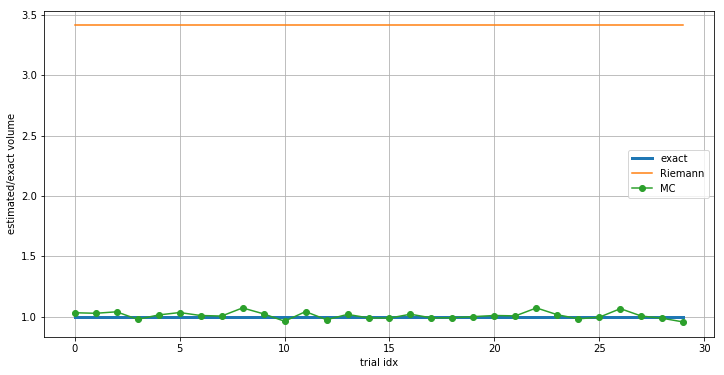

In [394]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(111)
ax1.plot(idx,np.ones(nTry),linewidth=3,label='exact')
ax1.plot(idx,vol1*np.ones(nTry),label='Riemann')
ax1.plot(idx,mcVec,'-o',label='MC')
ax1.set_xlabel('trial idx')
ax1.set_ylabel('estimated/exact volume')
ax1.grid()
ax1.legend()

### Test simple LInear Congruent Generator

In [401]:
def seedLCG(initVal):
    global randLCG
    randLCG = initVal
    
def lcg():
    a = 1140671485 #4
    c = 128201163 # 1
    m =  2**24 # 9
    global randLCG
    randLCG = (a*randLCG + c) % m
    return randLCG / m

def lcgN(n):
    return np.array([lcg() for i in range(n)])

In [406]:
def seedLCG(initVal):
    global randLCG
    randLCG = initVal
    
def lcg():
    a = 4
    c = 1
    m =  9
    global randLCG
    randLCG = (a*randLCG + c) % m
    return randLCG / m

def lcgN(n):
    return np.array([lcg() for i in range(n)])

In [359]:
seedLCG(3)

lcgN(10)

array([ 0.60934079,  0.94434386,  0.38775992,  0.89973587,  0.27463567,
        0.10495335,  0.68644905,  0.91211575,  0.76215422,  0.31842309])